## Classificador linear - 2D

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Base de dados :

In [2]:
data = pd.read_csv('iris.csv', header = None)
print(data)

       0    1    2    3               4
0    5.1  3.5  1.4  0.2     Iris-setosa
1    4.9  3.0  1.4  0.2     Iris-setosa
2    4.7  3.2  1.3  0.2     Iris-setosa
3    4.6  3.1  1.5  0.2     Iris-setosa
4    5.0  3.6  1.4  0.2     Iris-setosa
..   ...  ...  ...  ...             ...
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica

[150 rows x 5 columns]


## Transformação das classes :

In [3]:
data = data[:100]
data[4] = np.where(data.iloc[:, -1]=='Iris-setosa', -1, 1)
print(data)

      0    1    2    3  4
0   5.1  3.5  1.4  0.2 -1
1   4.9  3.0  1.4  0.2 -1
2   4.7  3.2  1.3  0.2 -1
3   4.6  3.1  1.5  0.2 -1
4   5.0  3.6  1.4  0.2 -1
..  ...  ...  ...  ... ..
95  5.7  3.0  4.2  1.2  1
96  5.7  2.9  4.2  1.3  1
97  6.2  2.9  4.3  1.3  1
98  5.1  2.5  3.0  1.1  1
99  5.7  2.8  4.1  1.3  1

[100 rows x 5 columns]


## Preparação da base de dados para utilização no classificador :

In [4]:
xo = np.ones(100)

features = np.asmatrix([xo, data[0] , data[2]])

features = features.transpose()

print(features[:10,:])

[[1.  5.1 1.4]
 [1.  4.9 1.4]
 [1.  4.7 1.3]
 [1.  4.6 1.5]
 [1.  5.  1.4]
 [1.  5.4 1.7]
 [1.  4.6 1.4]
 [1.  5.  1.5]
 [1.  4.4 1.4]
 [1.  4.9 1.5]]


In [5]:
labels = np.array(data[4])
print(labels[:100])

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1]


## Visualização das classes :

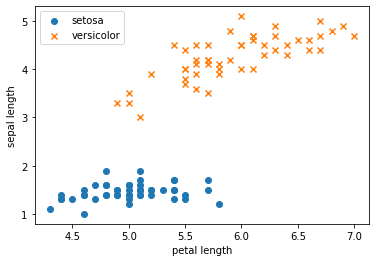

In [6]:
plt.scatter(np.array(features[:50,1]), np.array(features[:50,2]), marker='o', label='setosa')
plt.scatter(np.array(features[50:,1]), np.array(features[50:,2]), marker='x', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend()
plt.show()

## Inicialização e parâmetros do classificador :

In [7]:
#w = np.zeros(shape=(1, features.shape[1]))

w = np.random.randn(features.shape[1]).reshape(1,3)

misclassified_ = [] 

num_iter = 10

print('Inicializacao dos coeficientes w do classificador =', w)

Inicializacao dos coeficientes w do classificador = [[-0.28196672 -0.21467005 -0.61562474]]


## Algoritmo classificador utilizando o Perceptron :

In [8]:
for epoch in range(num_iter):
    
    misclassified = 0
    
    for x, label in zip(features, labels):
        
        y = np.dot(w, x.transpose())
        
        #perceptron:
        
        target = 1.0 if (y > 0) else -1.0
        
        #
        
        delta = (label - target)
        
        if(delta):
            misclassified += 1
            w += label * x
            
    misclassified_.append(misclassified)

epochs = np.arange(1, num_iter+1)

print('Coeficientes w do classificador =', w)

Coeficientes w do classificador = [[-3.28196672 -5.01467005 11.08437526]]


## Erro de classificação :

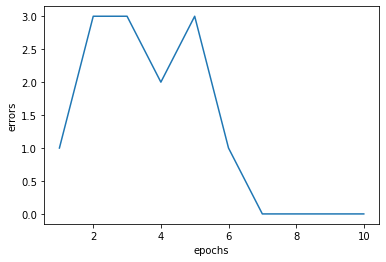

In [9]:
plt.plot(epochs, np.array(misclassified_))
plt.xlabel('epochs')
plt.ylabel('errors')
plt.show()

## Visualização do classificador :

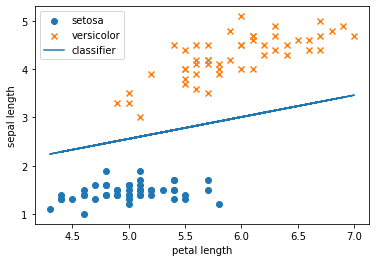

In [10]:
plt.scatter(np.array(features[:50,1]), np.array(features[:50,2]), marker='o', label='setosa')
plt.scatter(np.array(features[50:,1]), np.array(features[50:,2]), marker='x', label='versicolor')
plt.plot((np.array(features[:,1])), -w[0][0]/w[0][2]-w[0][1]/w[0][2]*(np.array(features[:,1])), label='classifier')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend()
plt.show()

## API

In [11]:
nova_planta = np.array([1, 6.7, 5.2])
classe_planta_nova = np.dot(w,nova_planta.transpose())
print('Valor do classificador =' + '' + str(classe_planta_nova))
classe_final = 'Versicolor' if (classe_planta_nova > 0) else 'Setosa'
print('A nova planta é da espécie:' , classe_final)

Valor do classificador =[20.75849535]
A nova planta é da espécie: Versicolor
